In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/Hitters.csv')
df= df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
Y=df["Salary"]
X=df.drop(['Salary','League','Division', 'NewLeague'],axis=1).astype('float64')
X=pd.concat([X,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A
10,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A


In [ ]:
df.shape

(263, 20)

In [ ]:
#alpha=landa
ridge_model=Ridge(alpha=0.1)
ridge_model.fit(X_train,Y_train)
ridge_model

Ridge(alpha=0.1)

In [ ]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [ ]:
ridge_model.intercept_

-4.578626905723581

In [ ]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [ ]:
lamdalar=10**np.linspace(10,-2,100)

In [ ]:
lamdalar

array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+07, 2.15443469e+07, 1.62975083e+07,
       1.23284674e+07, 9.32603347e+06, 7.05480231e+06, 5.33669923e+06,
       4.03701726e+06, 3.05385551e+06, 2.31012970e+06, 1.74752840e+06,
       1.32194115e+06, 1.00000000e+06, 7.56463328e+05, 5.72236766e+05,
       4.32876128e+05, 3.27454916e+05, 2.47707636e+05, 1.87381742e+05,
       1.41747416e+05, 1.07226722e+05, 8.11130831e+04, 6.13590727e+04,
       4.64158883e+04, 3.51119173e+04, 2.65608778e+04, 2.00923300e+04,
       1.51991108e+04, 1.14975700e+04, 8.69749003e+03, 6.57933225e+03,
       4.97702356e+03, 3.76493581e+03, 2.84803587e+03, 2.15443469e+03,
      

In [ ]:
ridge_model=Ridge()
katsayilar=[]
for lamda in lamdalar:
  ridge_model.set_params(alpha=lamda)
  ridge_model.fit(X_train,Y_train)
  katsayilar.append(ridge_model.coef_)

In [ ]:
katsayilar

[array([ 5.57430901e-04,  1.84133743e-04,  2.84139370e-05,  9.82372414e-05,
         1.01274160e-04,  8.18649209e-05,  1.57074339e-05,  9.91004859e-03,
         2.91562175e-03,  3.45115647e-04,  1.53074877e-03,  1.48290916e-03,
         1.07686100e-03,  9.48604074e-04,  7.92381062e-05,  1.40554243e-06,
         1.27210001e-07, -7.58840673e-07,  1.75831391e-07]),
 array([ 7.30573976e-04,  2.41529319e-04,  3.71956506e-05,  1.29032395e-04,
         1.32548326e-04,  1.07254295e-04,  1.99458218e-05,  1.26628992e-02,
         3.72981236e-03,  4.43350961e-04,  1.96078549e-03,  1.90112513e-03,
         1.37878683e-03,  1.24881876e-03,  1.03739333e-04,  1.89653022e-06,
         1.64877828e-07, -1.00323167e-06,  2.27758716e-07]),
 array([ 9.55527605e-04,  3.16229882e-04,  4.85771481e-05,  1.69223613e-04,
         1.73064108e-04,  1.40216946e-04,  2.50425372e-05,  1.60312795e-02,
         4.72911737e-03,  5.65246771e-04,  2.49043046e-03,  2.41735440e-03,
         1.75022208e-03,  1.64238686e-03, 

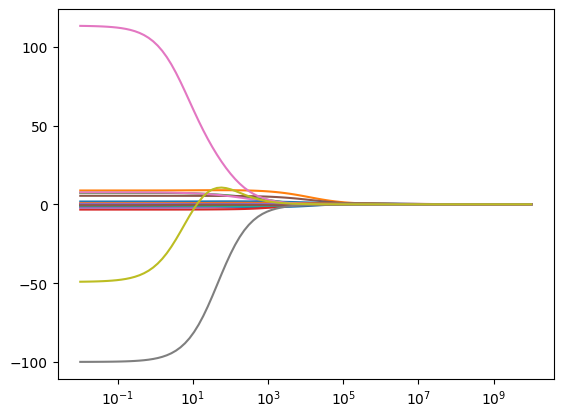

In [ ]:
ax=plt.gca()
ax.plot(lamdalar,katsayilar)
ax.set_xscale('log')
plt.show()

In [ ]:
ridge_model= Ridge().fit(X_train,Y_train)

In [ ]:
y_pred=ridge_model.predict(X_train)

In [ ]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [ ]:
Y_train[0:10]

,Salary
183,125.0
229,1940.0
286,940.0
102,375.0
153,100.0
320,960.0
135,90.0
213,100.0
308,750.0
161,657.0


In [ ]:
#train hatası
RMSE=np.sqrt(mean_squared_error(Y_train,y_pred))

In [ ]:
RMSE

289.34470696006565

In [ ]:
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,Y_train,cv=10,scoring="neg_mean_squared_error")))

351.39315856063297

In [ ]:
#test hatası
y_pred=ridge_model.predict(X_test)
RMSE=np.sqrt(mean_squared_error(Y_test,y_pred))
RMSE

356.8082905730243

In [ ]:
ridge_model=Ridge(100).fit(X_train,Y_train)
y_pred=ridge_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train,y_pred))

292.3299867073308

In [ ]:
#np.random.randint(0,100,10)
np.random.randint(0,100,size=10)

array([70, 72, 25, 99, 20, 86, 21, 96, 60, 96])

In [ ]:
landalar=np.random.randint(0,1000,100)

In [ ]:
landalar1=10**np.linspace(10,-2,100)*0.5

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
ridgeCv=RidgeCV(alphas=landalar,scoring="neg_mean_squared_error",cv=10)

In [ ]:
ridgeCv.fit(X_train,Y_train)

RidgeCV(alphas=array([933, 941, 778, 818, 356, 622, 729, 828, 705,  82, 976, 646, 317,
       673, 276, 322, 289, 285, 646, 965, 129, 373, 913, 473, 185, 936,
       125, 587, 329, 469, 496, 981, 963, 198, 862,  90, 801, 141, 779,
       634, 608, 981,  85,  52,  89, 123, 628, 631, 745, 193, 862, 259,
       566, 877, 779, 699, 769, 158, 490, 220, 387, 368, 233, 340, 846,
       750, 906,  28, 631, 156, 207, 629, 787, 387, 559, 554, 659, 975,
       773, 236, 593, 306, 424, 963, 442, 521, 407, 904, 531, 570, 228,
       320, 375, 730, 252, 279, 989, 476, 612,  15]),
        cv=10, scoring='neg_mean_squared_error')

In [ ]:
ridgeCv.alpha_

15

In [ ]:
#final model
ridge_tuned=Ridge(alpha=ridgeCv.alpha_).fit(X_train,Y_train)

In [ ]:
y_pred=ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

356.35342095529916